In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bz2 #para trabajar con el archivo comprimido en python
import time 

path_bookings='bookings.csv.bz2'
path_bookings_sample='bookings.sample.csv.bz2'
path_searches='searches.csv.bz2'
path_bookings_clean='bookings.clean.csv.bz2'

### Exercise 1  
Count the number of lines in Python for each file.

In [21]:
! ls -lt 

total 1018900
-rw------- 1 bea bea    152872 nov 22 19:39 reto_Amadeus.ipynb
-rw------- 1 bea bea       133 nov 22 18:57 02.out.csv
-rw------- 1 bea bea       325 nov 22 18:57 03.out.csv
-rw------- 1 bea bea      1274 nov 22 18:57 03_out_plot.png
-rw------- 1 bea bea    535893 nov 22 18:57 bookings.sample.csv.bz2
-rw------- 1 bea bea    244720 nov 22 18:57 searches.sample.csv.bz2
-rw------- 1 bea bea 554970628 nov 22 18:57 bookings.csv.bz2
-rw------- 1 bea bea   4232732 nov 22 18:57 bookings.sample.csv
-rw------- 1 bea bea 483188920 nov 22 18:57 searches.csv.bz2


In [24]:
# Extrae 100000 lineas para crear un archivo csv de muestra:

! bzcat bookings.csv.bz2 | head -n 10000 > bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = bookings.csv.bz2, output file = (stdout)


In [25]:
# comprime el archivo en formato bz2: 

! bzip2  bookings.sample.csv 

bzip2: Output file bookings.sample.csv.bz2 already exists.


In [26]:
! ls -lt

total 1018900
-rw------- 1 bea bea   4232732 nov 22 19:58 bookings.sample.csv
-rw------- 1 bea bea    153300 nov 22 19:57 reto_Amadeus.ipynb
-rw------- 1 bea bea       133 nov 22 18:57 02.out.csv
-rw------- 1 bea bea       325 nov 22 18:57 03.out.csv
-rw------- 1 bea bea      1274 nov 22 18:57 03_out_plot.png
-rw------- 1 bea bea    535893 nov 22 18:57 bookings.sample.csv.bz2
-rw------- 1 bea bea    244720 nov 22 18:57 searches.sample.csv.bz2
-rw------- 1 bea bea 554970628 nov 22 18:57 bookings.csv.bz2
-rw------- 1 bea bea 483188920 nov 22 18:57 searches.csv.bz2


In [27]:
! bzcat bookings.csv.bz2 | head -3

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      
2013-03-05 00:00:00^1A    ^DE      ^a68dd7ae953c8acfb187a1af2dcbe123^1a11ae49fcbf545fd2afc1a24d88d2b7^ea65900e72d71f4626378e2ebd298267^2013-02-22 00:00:00^1708^0^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHRZRH  ^LONZRH  ^CHGB    ^1^LHRZRH         ^VI^T        ^Y        ^2013-03-07 08:50:00^2013-03-07 11:33:37^-1^2013^3^NULL     
2013-03-26 00:00:00^1A    ^US      ^e612b9eeeee6f17f42d9b0d3b79e75ca^7437560d8f276d6d05eeb806d9e7edee^737295a86982c941f1c2da9a46a14043^2013-03-26 00:00:00^135270^0^SAL     ^SAL     ^SV      ^

###### Exercise 1:  
Pruebas con archivo de muestra.

In [34]:
# Forma no recomendada de acceder al archivo comprimido. 
# Requiere cerrar el archivo más tarde (o produce error si se ejecuta de nuevo).

fileBz2=bz2.BZ2File(path_bookings_sample)

In [35]:
fileBz2.close

<bound method BZ2File.close of <bz2.BZ2File object at 0x7f8e8c1926d8>>

In [36]:
# Forma recomendada para acceder al archivo comprimido. El archivo queda cerrado en la misma instrucción.
# Prueba: contar líneas con el archivo de muestra.

with bz2.BZ2File(path_bookings_sample) as fileBz2:
    counter=0
    for line in fileBz2: counter=counter+1
print (counter)

10000


#### Exercise 1_1: Número de líneas en bookings.csv.bz2 (con Python)

In [71]:
t_0=time.process_time() # Inicio del proceso

with bz2.BZ2File(path_bookings) as fileBz2:
    counter=0
    for line in fileBz2: counter=counter+1
num_lineas_booking=counter

tempus=time.process_time()-t_0 # Tiempo de proceso

print (f'tiempo de proceso: {tempus}')
print (f'número de líneas en {path_bookings}: {num_lineas_booking}')

tiempo de proceso: 123.70086993300015
número de líneas en bookings.csv.bz2: 10000011


#### Exercise 1_2: Número de líneas en searches.csv.bz2 (con Python)

In [65]:
t_0=time.process_time() 

with bz2.BZ2File(path_searches) as fileBz2:
    counter=0
    for line in fileBz2: counter=counter+1
num_lineas_searches=counter

tempus=time.process_time()-t_0 

print (f'tiempo de proceso: {tempus}')
print (f'número de líneas en {path_searches}: {num_lineas_searches}')

tiempo de proceso: 139.14108804600005
número de líneas en searches.csv.bz2: 20390199


#### Exercise 1_1: Número de líneas en bookings.csv.bz2 (con Pandas)

In [68]:
# Pruebas con sample. Crea iterable descomprimiendo fragmento a fragmento:

reader=pd.read_csv(path_bookings_sample,compression='bz2',\
                  sep='^',iterator=True,chunksize=1000)

In [69]:
# Pruebas con sample. Cuenta filas de dataframe de muestra:

t_0=time.process_time()

nrows=0
for df in reader: nrows=nrows+len(df)
    
tempus=time.process_time()-t_0

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en {path_bookings_sample}: {nrows}')

tiempo de proceso: 0.22774768899989795
número de filas en bookings.sample.csv.bz2: 9999


In [70]:
# Filas de dataframe bookings (excluída fila de títulos de col.):

t_0=time.process_time()

Big_reader=pd.read_csv(path_bookings,compression='bz2',\
                  sep='^',iterator=True,chunksize=10000)
nrows=0
for df in Big_reader: nrows=nrows+len(df)

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en {path_bookings}: {nrows}')

tiempo de proceso: 0.22774768899989795
número de filas en bookings.csv.bz2: 10000010


#### Exercise 1_2: Número de líneas en searches.csv.bz2 (con Pandas)

In [72]:
# Filas del dataframe searches:

t_0=time.process_time()

Big_reader_2=pd.read_csv(path_searches,compression='bz2',\
                  sep='^',iterator=True,chunksize=10000)
nrows=0
for df in Big_reader_2: 
    nrows=nrows+len(df)

tempus=time.process_time()-t_0

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en {path_searches}: {nrows}')

tiempo de proceso: 203.84343241800002
número de filas en searches.csv.bz2: 20390198


## Exercise 2  
Top 10 arrival airports in the world in 2013 (using the bookings file).  
- Arrival airport is the column arr_port. It is the IATA code for the airport.  
- To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).  
- Print the top 10 arrival airports in the standard output, including the number of passengers.  
- Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github).  
- Bonus point: Solve this problem using pandas (instead of any other approach).

###### Inspección rápida de sample de bookings: 

In [125]:
df_bo_sample=pd.read_csv(path_bookings_sample,delimiter='^')

In [60]:
df_bo_sample.shape

(9999, 38)

In [56]:
df_bo_sample.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [57]:
df_bo_sample.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [58]:
# Para evitar contar espacios en blanco, referencia a columnas por posición:

df_bo_sample.columns[5]

'rloc          '

In [59]:
# Valores únicos de columna rloc en bookings.sample:

df_bo_sample[df_bo_sample.columns[5]].nunique()

3638

###### Exercise2  
Pruebas con csv de muestra. Ajustes para homogeneizar registros antes de eliminar duplicados.   

In [126]:
# Arreglos en títulos de columnas:

for col in df_bo_sample.columns: 
    df_bo_sample=df_bo_sample.rename(columns={col:col.strip()})
print (df_bo_sample.columns)

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')


In [127]:
# Para identificar columnas no numéricas:

print (df_bo_sample.dtypes)
print (f'{len(df_bo_sample.columns)} columnas')

act_date     object
source       object
pos_ctry     object
pos_iata     object
pos_oid      object
rloc         object
cre_date     object
duration      int64
distance      int64
dep_port     object
dep_city     object
dep_ctry     object
arr_port     object
arr_city     object
arr_ctry     object
lst_port     object
lst_city     object
lst_ctry     object
brd_port     object
brd_city     object
brd_ctry     object
off_port     object
off_city     object
off_ctry     object
mkt_port     object
mkt_city     object
mkt_ctry     object
intl          int64
route        object
carrier      object
bkg_class    object
cab_class    object
brd_time     object
off_time     object
pax           int64
year          int64
month         int64
oid          object
dtype: object
38 columnas


In [140]:
# Lista de columnas de tipo object: 

obj_cols=df_bo_sample.columns[df_bo_sample.dtypes==object]
print (obj_cols)
print (f'{len (obj_cols)} columnas tipo object')

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city',
       'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city',
       'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city',
       'mkt_ctry', 'route', 'carrier', 'bkg_class', 'cab_class', 'brd_time',
       'off_time', 'oid'],
      dtype='object')
32 columnas tipo object


In [141]:
# Fila 3 como referencia para identificar columnas en mayúsculas (tiene registros en todas las col. no númericas).

df_bo_sample[obj_cols].iloc[3]

act_date                  2013-03-26 00:00:00
source                                     1A
pos_ctry                                   AU
pos_iata     0f984b3bb6bd06661c95529bbd6193bc
pos_oid      36472c6dbaf7afec9136ac40364e2794
rloc         5ecf00fdcbcec761c43dc7285253d0c1
cre_date                  2013-03-26 00:00:00
dep_port                                  AKL
dep_city                                  AKL
dep_ctry                                   NZ
arr_port                                  SVO
arr_city                                  MOW
arr_ctry                                   RU
lst_port                                  AKL
lst_city                                  AKL
lst_ctry                                   NZ
brd_port                                  AKL
brd_city                                  AKL
brd_ctry                                   NZ
off_port                                  SVO
off_city                                  MOW
off_ctry                          

In [142]:
# Lista de columnas con registros que deben estar escritos en mayúsculas:

uppercase_cols=list()
for col in obj_cols: 
    if df_bo_sample[col].iloc[3]==df_bo_sample[col].iloc[3].upper():
        uppercase_cols.append(col)
print (uppercase_cols)

['act_date', 'source', 'pos_ctry', 'cre_date', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry', 'route', 'carrier', 'bkg_class', 'cab_class', 'brd_time', 'off_time', 'oid']


In [143]:
# Para homogenizar registros en columnas no numéricas: 

for col in obj_cols: 
    df_bo_sample[col]=df_bo_sample[col].str.strip() # Quitar blancos delante y detŕas 
for col in uppercase_cols: 
    df_bo_sample[col]=df_bo_sample[col].str.upper() # Corrige posibles minúsculas indebidas
df_bo_sample.head()


,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [145]:
# Eliminar filas duplicadas y seleccionar columnas relevantes:

df_bo_sample_rdz=df_bo_sample.drop_duplicates()[['arr_port','pax']]
print (f'{len(df_bo_sample_rdz)} filas no duplicadas en {path_bookings_sample}')

9999 filas no duplicadas en bookings.sample.csv.bz2


###### Exercise2   
Top 10 aeropuertos por pasajeros en sample como **benchmark** para comprobación posterior.

In [147]:
top10_bmark=df_bo_sample_rdz.groupby('arr_port').sum().sort_values(by='pax',ascending=False)[:10]
top10_bmark

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


###### Exercise2   
Top 10 aeropuertos por pasajeros en sample leyendo chunk a chunk:

In [185]:
# Prueba con sample usando chunks: 
# Ensayo para eliminar duplicados.

t_0 = time.process_time()

small_chk=100
reader=pd.read_csv(path_bookings_sample,compression='bz2',\
                  sep='^',iterator=True,chunksize=small_chk)
df_aux_0=pd.DataFrame()
last_recorded_len=0
for i, df in enumerate(reader):
    for col in df.columns: 
        df=df.rename(columns={col:col.strip()}) # Edita títulos de columna
    for col in obj_cols: # Lista de cols. no numéricas
        df[col]=df[col].str.strip() # Elimina blancos delante y detrás en cols. no numéricas
    for col in uppercase_cols: # Lista de cols. que deben ser en mayúsculas
        df[col]=df[col].str.upper() # Corrige posibles minúsculas indebidas    
    df_aux_1=df_aux_0.append(df) # Añade df editado 
    df_aux_2=df_aux_1.drop_duplicates()
    if (i+1)%50==0:
        print(f'{i+1} chunks de {small_chk} filas; {len(df_aux_2)-last_recorded_len} filas nuevas')
        last_recorded_len=len(df_aux_2) # Último registro de filas en df_aux 
    df_aux_0=df_aux_2
    #if (i+1)==150: break # Sanity check for tests 

df_bo_smpl_clean=df_aux_0.copy()

tempus = time.process_time() - t_0  

print (f'tiempo de proceso: {tempus}')
print (f'número de filas distintas en {path_bookings_sample}: {len(df_bo_smpl_clean)}')

50 chunks de 100 filas; 5000 filas nuevas
100 chunks de 100 filas; 4999 filas nuevas
tiempo de proceso: 8.026498119999815
número de filas distintas en bookings.sample.csv.bz2: 9999


In [198]:
# Top10 aeropuertos por pasajeros en csv de muestra leída con chunks:

relevant_cols=['arr_port','pax']
df_bo_smpl_rdzd=df_bo_smpl_clean[relevant_cols]
top10_sample=df_bo_smpl_rdzd.groupby('arr_port').sum().sort_values(by='pax',ascending=False)[:10]
top10_sample

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


In [199]:
# Comprobación: Comparación del resultado con el benchmark (requiere prescindir de índices)

top10_bmark.reset_index(drop=True).equals(top10_sample.reset_index(drop=True))

True

###### Exercise2   
Top 10 aeropuertos por pasajeros en booking.csv.bz2. 

In [187]:
# Intento de eliminar duplicados (requiere recursos para trabajar con el df sin duplicados completo).

t_0 = time.process_time()

big_chk=10000
reader=pd.read_csv(path_bookings,compression='bz2',\
                  sep='^',iterator=True,chunksize=big_chk)
df_aux_0=pd.DataFrame()
last_recorded_len=0
for i, df in enumerate(reader):
    for col in df.columns: 
        df=df.rename(columns={col:col.strip()}) # Edita títulos de columna
    for col in obj_cols: # Lista de columnas no numéricas
        df[col]=df[col].str.strip() # Elimina blancos delante y detrás en cols. no numéricas
    for col in uppercase_cols: # Lista de columnas que deben ser en mayúsculas
        df[col]=df[col].str.upper() # Corrige posibles minúsculas indebidas    
    df_aux_1=df_aux_0.append(df) # Añade df editado 
    df_aux_2=df_aux_1.drop_duplicates()
    if (i+1)%50==0:
        print(f'{i+1} chunks de {big_chk} filas; {len(df_aux_2)-last_recorded_len} filas nuevas')
        last_recorded_len=len(df_aux_2) # Último registro de filas en df_aux 
    df_aux_0=df_aux_2
    #if (i+1)==150: break # Sanity check for tests 

df_bo_clean=df_aux_0.copy()

tempus = time.process_time() - t_0  

print (f'tiempo de proceso: {tempus}')
print (f'número de filas distintas en {path_bookings}: {len(df_bo_clean)}')

50 chunks de 10000 filas; 500000 filas nuevas
100 chunks de 10000 filas; 500000 filas nuevas
150 chunks de 10000 filas; 0 filas nuevas
200 chunks de 10000 filas; 0 filas nuevas
250 chunks de 10000 filas; 0 filas nuevas
300 chunks de 10000 filas; 0 filas nuevas
350 chunks de 10000 filas; 0 filas nuevas
400 chunks de 10000 filas; 0 filas nuevas
450 chunks de 10000 filas; 0 filas nuevas
500 chunks de 10000 filas; 0 filas nuevas
550 chunks de 10000 filas; 9993 filas nuevas
600 chunks de 10000 filas; 0 filas nuevas
650 chunks de 10000 filas; 0 filas nuevas
700 chunks de 10000 filas; 0 filas nuevas
750 chunks de 10000 filas; 0 filas nuevas
800 chunks de 10000 filas; 0 filas nuevas
850 chunks de 10000 filas; 0 filas nuevas
900 chunks de 10000 filas; 0 filas nuevas
950 chunks de 10000 filas; 0 filas nuevas
1000 chunks de 10000 filas; 0 filas nuevas
tiempo de proceso: 5635.870549705998
número de filas distintas en bookings.csv.bz2: 1009993


In [180]:
df_bo_clean.to_csv('bookings.clean.csv.bz2',sep='^',compression='bz2',index=False)
# path to bookings.clean.csv.bz2 en primera celda

In [191]:
# Inspección: 
 
reader=pd.read_csv(path_booking_clean,compression='bz2',\
                  sep='^',iterator=True,chunksize=small_chk)
for df in reader: 
    df_check=df
    break
print (df_check.shape)
df_check.head()

(100, 38)


,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1.0,2013.0,3.0,NaN
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1.0,2013.0,3.0,NaN
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1.0,2013.0,3.0,NaN
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1.0,2013.0,3.0,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1.0,2013.0,3.0,SYDA82546


###### Aclaración:   
El procedimiento empleado para eliminar duplicados funciona porque hay muchos: el dataset que se va construyendo chunk a chunk con las filas no duplicadas es manejable con los recursos del equipo. El proceso requiere operar con todo el dataframe que se va construyendo porque es la referencia para identificar nuevos duplicados en cada nuevo chunk y añadir solo las filas no repetidas.   
Si el número de duplicados fuera menor y todos los chunk aportaran un buen número de filas originales, el dataframe se haría inmanejable para la cpu con unos pocos chunks.   
Por este motivo entiendo que el problema no está bien resuelto. Es más correcto diseñar un proceso que permita eliminar duplicados también cuando son pocos y el dataframe sin duplicados sigue siendo inmanejable con un pc doméstico. 

In [203]:
# Dataframe reducido (columnas relevantes) agrupadas por aeropuertos: 
# Sigo trajando con chunks como ejercicio, aunque el dataframe sin duplicados ya no lo requiere.

t_0=time.process_time()

relevant_cols=['arr_port','pax']
reader=pd.read_csv(path_bookings_clean,compression='bz2',\
                  sep='^',iterator=True,chunksize=big_chk,\
                  usecols=relevant_cols)
df_aux_0=pd.DataFrame()
for i, df in enumerate(reader):
    df_aux_1=df.groupby('arr_port').sum() # Agrupación chunk a chunk
    df_aux_0=df_aux.append(df_1)
    if (i+1)%50==0: print (f'{i+1} chunks de {big_chk} filas añadidos')
    #if (i+1)==51: break # Sanity check
df_bookings_PaxPerAirport=df_aux_0.copy()

tempus=time.process_time()-t_0

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en df_bookings_PaxPerAirport: {len(df_bookings_PaxPerAirport)}')

50 chunks de 10000 filas añadidos
100 chunks de 10000 filas añadidos
tiempo de proceso: 10.763636962001328
número de filas en df_bookings_PaxPerAirport: 2271


#### Exercise 2: Top 10 de aeropuertos de destino por pasajeros

In [204]:
n_for_top_list=10
# (Nueva agrupación sobre el df con los chunks reunidos)
top_bookings=df_bookings_PaxPerAirport.groupby('arr_port').sum()\
            .sort_values(by='pax',ascending=False)[:n_for_top_list]
top_bookings

,pax
arr_port,
HKG,160
LGA,118
MCO,115
ORD,110
JFK,104
SFO,101
LAX,97
DCA,86
LHR,85


In [205]:
top_bookings.to_csv('02.out.csv',sep='^')

In [206]:
# Inspección: 

df=pd.read_csv('02.out.csv',sep='^')
df.head(10)

,arr_port,pax
0,HKG,160
1,LGA,118
2,MCO,115
3,ORD,110
4,JFK,104
5,SFO,101
6,LAX,97
7,DCA,86
8,LHR,85
9,DEN,83


In [73]:
# Exercise 3. Sample file para searches: 
! bzcat /home/dsc/bdeotto/reto_amadeus/searches.csv.bz2 | head -n 10000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/bdeotto/reto_amadeus/searches.csv.bz2, output file = (stdout)


In [74]:
! bzip2  searches.sample.csv 

In [75]:
! ls -lt

total 1018780
-rw-rw-r-- 1 dsc dsc    244720 nov 21 09:37 searches.sample.csv.bz2
-rw-rw-r-- 1 dsc dsc     35443 nov 21 09:35 reto_Amadeus.ipynb
-rw-rw-r-- 1 dsc dsc       133 nov 21 09:18 02.output.csv
-rw-rw-r-- 1 dsc dsc   4232732 nov 20 22:42 bookings.sample.csv
-rw-rw-r-- 1 dsc dsc    535893 nov 20 18:24 bookings.sample.csv.bz2
-rw-rw-r-- 1 dsc dsc 554970628 nov 20 17:17 bookings.csv.bz2
-rw-rw-r-- 1 dsc dsc 483188920 nov 20 17:17 searches.csv.bz2


In [120]:
df_searches_sample=pd.read_csv('searches.sample.csv.bz2',compression='bz2',sep='^')

In [121]:
df_searches_sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [122]:
df_searches_sample.shape

(9999, 45)

In [123]:
df_searches_sample.columns.sort_values()

Index(['Country', 'Date', 'Destination', 'From', 'InternetOffice',
       'IsFromInternet', 'IsFromVista', 'IsPublishedForNeg', 'NbSegments',
       'OfficeID', 'Origin', 'RoundTrip', 'Seg1Arrival', 'Seg1BookingCode',
       'Seg1Carrier', 'Seg1Date', 'Seg1Departure', 'Seg2Arrival',
       'Seg2BookingCode', 'Seg2Carrier', 'Seg2Date', 'Seg2Departure',
       'Seg3Arrival', 'Seg3BookingCode', 'Seg3Carrier', 'Seg3Date',
       'Seg3Departure', 'Seg4Arrival', 'Seg4BookingCode', 'Seg4Carrier',
       'Seg4Date', 'Seg4Departure', 'Seg5Arrival', 'Seg5BookingCode',
       'Seg5Carrier', 'Seg5Date', 'Seg5Departure', 'Seg6Arrival',
       'Seg6BookingCode', 'Seg6Carrier', 'Seg6Date', 'Seg6Departure',
       'TerminalID', 'Time', 'TxnCode'],
      dtype='object')

In [146]:
df_searches_sample[df_searches_sample['Destination'].isin(['AGP','MAD','BCN'])].tail(10)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
9654,2013-01-10,20:21:03,MPT,489153b50ba6de99e1dd44d92db2c06b,ES,SCQ,AGP,0,1,SCQ,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BCN
9686,2013-01-10,08:12:58,MPT,9789d17ec2629741f00ca74dda3a42d6,SE,CPH,BCN,1,2,CPH,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
9699,2013-01-10,21:05:16,FFP,8e26311e3f5deaceabc65406c823f84d,DE,FMO,AGP,0,1,FMO,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER
9791,2013-01-10,00:44:19,MPT,6e24119020ec336ea9eb4b0592720e67,FR,BRU,BCN,1,2,BRU,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
9794,2013-01-10,05:07:30,FXP,23ef225b0b432c6a7ab16a2fd4cbe742,DE,FRA,MAD,1,2,FRA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
9830,2013-01-10,16:10:02,MPT,313fef8a27f062036781318cd9015a97,FI,HEL,AGP,1,2,HEL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HEL
9881,2013-01-10,09:35:22,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,MUC,BCN,0,1,MUC,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
9906,2013-01-10,09:40:22,FXA,3ad98ba166b0e89f5151e5fe0187f588,ES,PMI,MAD,0,1,PMI,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,eafee70ca1d806dec0164e883a81b009,PMI
9947,2013-01-10,02:40:34,MTP,236cbf458f79dbb9d5e9c9430438c3db,US,JFK,MAD,1,2,JFK,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
9950,2013-01-10,05:06:22,MPT,440642a9bdaeb6287f826cefd73255e8,US,MEX,MAD,1,2,MEX,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN


In [137]:
print (df_searches_sample[df_searches_sample['Destination'].isin(['AGP','MAD','BCN'])].shape)


df_searches_sample_rduced=df_searches_sample[df_searches_sample['Destination'].isin(['AGP','MAD','BCN'])]\
                                .drop_duplicates(subset=['Date','Time','OfficeID','TerminalID','InternetOffice'])


print ('df_searches_sample_rduced.shape:',df_searches_sample_rduced.shape)
df_searches_sample_rduced.sample(10)

(335, 45)
df_searches_sample_rduced.shape: (335, 45)


,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
8996,2013-01-09,15:25:34,MPT,1ca95f6077d443cf06c04854a1c36d48,PL,GDN,BCN,1,2,GDN,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,QYO
3945,2013-01-04,04:07:04,MPT,77db943d16ae24bc18eea1a0d7b40f4b,ES,PEK,MAD,1,2,PEK,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,VLC
9609,2013-01-10,08:32:22,CAL,99a5fa66a00828db9727aea7ebc6ae74,DE,HAM,BCN,1,2,HAM,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER
8520,2013-01-09,11:31:42,MPT,e15fd59d60ed51d150529f5e8c2e7934,ES,BCN,AGP,1,2,BCN,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BCN
3390,2013-01-04,15:39:06,MPT,7f45b8c2329242b93ccfcc1082036bc3,IT,VIE,BCN,1,2,VIE,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,ROM
4757,2013-01-05,02:30:07,MPT,50c54b52322080d2c257390f714f91bd,ES,BUE,MAD,0,1,BUE,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
4820,2013-01-05,22:22:38,FFP,74d4117c29f852be6b92d6ebbf0fcf6b,QA,PSA,MAD,0,1,PSA,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,DOH
9116,2013-01-10,12:13:19,FFP,8e26311e3f5deaceabc65406c823f84d,DE,DUS,BCN,1,2,DUS,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER
9442,2013-01-10,16:58:05,MPT,367937ca733d0d562ca6b751274304c8,GB,STN,AGP,1,2,STN,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON
8345,2013-01-09,01:54:34,MPT,ab93c39b49feffbc80c2cb5420106c87,FR,CDG,MAD,0,1,CDG,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR


In [143]:
df_searches_sample_mini=df_searches_sample_rduced[['Date','Destination']].copy()
df_searches_sample_mini['Year']=df_searches_sample_mini['Date'].str.split('-').str[0]
df_searches_sample_mini['Month']=df_searches_sample_mini['Date'].str.split('-').str[1]

df_searches_sample_mini.head()

,Date,Destination,Year,Month
4,2013-01-01,MAD,2013,01
93,2013-01-01,AGP,2013,01
113,2013-01-01,BCN,2013,01
147,2013-01-01,AGP,2013,01
151,2013-01-01,MAD,2013,01


In [147]:
df_searches_sample_mini.pivot_table(index=['Year','Month'],columns='Destination',values='Date',aggfunc='count')


,Destination,AGP,BCN,MAD
Year,Month,,,
2013,01,48,162,125


In [167]:
# Exercise 3. 

Big_reader=pd.read_csv('searches.csv.bz2',compression='bz2',\
                  sep='^',iterator=True,chunksize=10000)
df_aux=pd.DataFrame()
n=0
for df in Big_reader:
    df_rduced=df[df['Destination'].isin(['AGP','MAD','BCN'])]\
            .drop_duplicates(subset=['Date','Time','OfficeID','TerminalID','InternetOffice'])
    df_mini=df_rduced[['Date','Destination']].copy()
    df_aux=df_aux.append(df_mini)
    n=n+1
    #if n==3: break
    if n%50==0: print (f'{n} df añadidos')
df_aux.shape

50 df añadidos
100 df añadidos
150 df añadidos
200 df añadidos
250 df añadidos
300 df añadidos
350 df añadidos
400 df añadidos
450 df añadidos
500 df añadidos
550 df añadidos
600 df añadidos
650 df añadidos
700 df añadidos
750 df añadidos
800 df añadidos
850 df añadidos
900 df añadidos
950 df añadidos
1000 df añadidos
1050 df añadidos
1100 df añadidos
1150 df añadidos
1200 df añadidos
1250 df añadidos
1300 df añadidos
1350 df añadidos
1400 df añadidos
1450 df añadidos
1500 df añadidos
1550 df añadidos
1600 df añadidos
1650 df añadidos
1700 df añadidos
1750 df añadidos
1800 df añadidos
1850 df añadidos
1900 df añadidos
1950 df añadidos
2000 df añadidos


(676349, 2)

In [168]:
df_searches_mini=df_aux.copy()
df_searches_mini['Year']=df_searches_mini['Date'].str.split('-').str[0]
df_searches_mini['Month']=df_searches_mini['Date'].str.split('-').str[1]

df_searches_mini.tail()

,Date,Destination,Year,Month
20389978,2013-10-13,BCN,2013,10
20390045,2013-10-13,MAD,2013,10
20390073,2013-10-13,AGP,2013,10
20390160,2013-10-13,MAD,2013,10
20390196,2013-10-13,MAD,2013,10


In [171]:
df_searches_mini_PT=df_searches_mini.pivot_table(index=['Year','Month'],columns='Destination',\
                                                 values='Date',aggfunc='count')
df_searches_mini_PT.head(15)

Destination    AGP    BCN    MAD
Year Month                      
2013 01       9633  29469  24225
     02       8379  28329  22800
     03      10659  30552  24681
     04       8265  31236  25251
     05      10830  28728  26334
     06       7923  26505  22800
     07       8892  29241  22971
     08       7866  27075  21831
     09       8151  23427  21147
     10       6499  20276  22294
     11       6384  19824  20272
     12       3696  15400  14504

In [194]:
df_searches_mini_PT.to_csv('03.out.csv',sep='^')

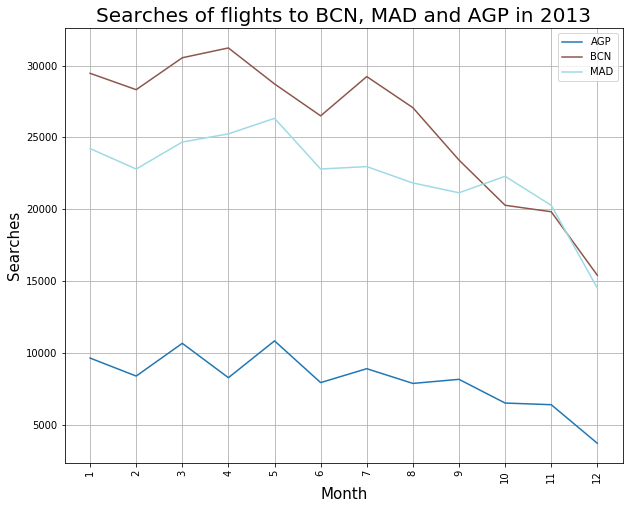

<Figure size 432x288 with 0 Axes>

In [192]:
import matplotlib.pyplot as plt
df_searches_mini_PT.plot(figsize=(10,8),cmap='tab20')
plt.title('Searches of flights to BCN, MAD and AGP in 2013',fontsize=20)
plt.grid(True)
plt.legend(loc='best',fontsize='medium',frameon=True)
plt.ylabel('Searches',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(np.arange(12),np.arange(1,13,1),rotation='vertical')
plt.show()
plt.savefig('03_out_plot')

In [211]:
# Exercise 4. Pruebas

rlvnt_cols=['Date','Time','OfficeID','Country','Origin','Destination','Seg1Date']
reader=pd.read_csv('searches.csv.bz2',compression='bz2',sep='^',iterator=True,\
                   usecols=rlvnt_cols,chunksize=1000)
df_aux=pd.DataFrame()
n=0
for i, df in enumerate(reader):  
    df=df.drop_duplicates()
    df.columns=df.columns.str.strip()

    
    
    
    
    df_aux=df_aux.append(df)
    n=n+1
    if i==101: break
    if 1%50==0: print (f'{n} df añadidos')

#df_aux.shape

Index(['Date', 'Time', 'OfficeID', 'Country', 'Origin', 'Destination',
       'Seg1Date'],
      dtype='object')
         Date      Time                          OfficeID Country Origin  \
0  2013-01-01  20:25:57  624d8c3ac0b3a7ca03e3c167e0f48327      DE    TXL   
1  2013-01-01  10:15:33  b0af35b31588dc4ab06d5cf2986e8e02      MD    ATH   
2  2013-01-01  18:04:49  3561a60621de06ab1badc8ca55699ef3      US    ICT   
3  2013-01-01  17:42:40  1864e5e8013d9414150e91d26b6a558b      SE    RNB   
4  2013-01-01  17:48:29  1ec336348f44207d2e0027dc3a68c118      NO    OSL   

  Destination    Seg1Date  
0         AUH  2013-01-26  
1         MIL  2013-01-04  
2         SFO  2013-08-02  
3         ARN  2013-01-02  
4         MAD  2013-03-22  


In [209]:
rlvnt_cols=['Date','Time','OfficeID','Country','Origin','Destination','Seg1Date']
df[rlvnt_cols].head()
print (df.shape, df['TerminalID'].nunique())
df[rlvnt_cols].head()

(1000, 45) 59


,Date,Time,OfficeID,Country,Origin,Destination,Seg1Date,TerminalID,InternetOffice
0,2013-01-01,20:25:57,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,2013-01-26,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,2013-01-04,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,2013-08-02,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,2013-01-02,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,2013-03-22,d41d8cd98f00b204e9800998ecf8427e,OSL


In [202]:
df['Seg1BookingCode']

0      NaN
1      NaN
2      NaN
3        W
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21       Y
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
      ... 
970    NaN
971    NaN
972    NaN
973    NaN
974    NaN
975    NaN
976    NaN
977    NaN
978      B
979    NaN
980    NaN
981    NaN
982    NaN
983    NaN
984    NaN
985    NaN
986    NaN
987    NaN
988    NaN
989    NaN
990      L
991    NaN
992    NaN
993    NaN
994    NaN
995    NaN
996      B
997    NaN
998    NaN
999    NaN
Name: Seg1BookingCode, Length: 1000, dtype: object